<a href="https://colab.research.google.com/github/namtoptall/DataScience/blob/main/iception_milestone_project_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Xây dựng hệ thống gợi ý hoa

## Bước 1 - Huấn luyện mô hình : Model training
**Lưu ý ⚠ em huấn luyện mô hình trên google colab nên nếu muốn chạy lại toàn bộ thì cần set up những tài khoản sau :**
> tài khoản kaggle và kaggle API cho việc download bộ dữ liệu

> tài khoản google Drive để kết nối với kho dữ liệu cá nhân



### kết nối với google drive và kaggle

Với kaggle : thực hiện tải tệp kaggle.json(Chứa thông tin tài khoản) lên

In [1]:
from google.colab import files
files.upload()  # Thực hiện tải tệp kaggle.json lên từ máy tính (phải có tài khoản kaggle nha)

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"namdz242221","key":"de869a9575f6ac51974bca65557d88a7"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Mount google drive content vào trong notebook

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!kaggle datasets download -d namdz242221/dsp305x-01-a-vn-dataset

Dataset URL: https://www.kaggle.com/datasets/namdz242221/dsp305x-01-a-vn-dataset
License(s): MIT
100% 530M/530M [00:20<00:00, 30.2MB/s]
100% 530M/530M [00:20<00:00, 27.5MB/s]


unzip the dataset

In [5]:
!unzip dsp305x-01-a-vn-dataset.zip -d /content/dataset


Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: /content/dataset/DSP305x_01-A_VN-dataset/val/Peach blossom/000629.jpg  
  inflating: /content/dataset/DSP305x_01-A_VN-dataset/val/Peach blossom/000630.jpg  
  inflating: /content/dataset/DSP305x_01-A_VN-dataset/val/Peach blossom/000631.jpg  
  inflating: /content/dataset/DSP305x_01-A_VN-dataset/val/Peach blossom/000632.jpg  
  inflating: /content/dataset/DSP305x_01-A_VN-dataset/val/Peach blossom/000633.jpg  
  inflating: /content/dataset/DSP305x_01-A_VN-dataset/val/Peach blossom/000637.jpg  
  inflating: /content/dataset/DSP305x_01-A_VN-dataset/val/Peach blossom/000638.jpg  
  inflating: /content/dataset/DSP305x_01-A_VN-dataset/val/Peach blossom/000639.jpg  
  inflating: /content/dataset/DSP305x_01-A_VN-dataset/val/Peach blossom/000641.jpg  
  inflating: /content/dataset/DSP305x_01-A_VN-dataset/val/Peach blossom/000642.jpg  
  inflating: /content/dataset/DSP305x_01-A_VN-dataset/val/Peach blossom/000643.jpg  
  inflat

In [6]:
!ls /content/dataset

DSP305x_01-A_VN-dataset


check content trong tệp

In [7]:
!ls /content/dataset

DSP305x_01-A_VN-dataset


In [8]:
import os
dataset_dir = "/content/dataset"
for root, dirs, files in os.walk(dataset_dir):
    print(root, "contains", len(files), "files.")


/content/dataset contains 0 files.
/content/dataset/DSP305x_01-A_VN-dataset contains 1 files.
/content/dataset/DSP305x_01-A_VN-dataset/val contains 0 files.
/content/dataset/DSP305x_01-A_VN-dataset/val/Chrysanthemum contains 871 files.
/content/dataset/DSP305x_01-A_VN-dataset/val/Plum blossom contains 881 files.
/content/dataset/DSP305x_01-A_VN-dataset/val/Sunflower contains 855 files.
/content/dataset/DSP305x_01-A_VN-dataset/val/Rose contains 913 files.
/content/dataset/DSP305x_01-A_VN-dataset/val/Plumeria contains 864 files.
/content/dataset/DSP305x_01-A_VN-dataset/val/Peony contains 883 files.
/content/dataset/DSP305x_01-A_VN-dataset/val/Bougainvillea contains 939 files.
/content/dataset/DSP305x_01-A_VN-dataset/val/Peach blossom contains 862 files.
/content/dataset/DSP305x_01-A_VN-dataset/val/Orchid contains 870 files.
/content/dataset/DSP305x_01-A_VN-dataset/val/Lotus contains 882 files.
/content/dataset/DSP305x_01-A_VN-dataset/train contains 0 files.
/content/dataset/DSP305x_01-A_

check shape của từng ảnh

In [9]:
from PIL import Image
import os
from collections import defaultdict

def check_unique_shapes(dataset_dir):
    # count the number of difference shapes
    shape_counts = defaultdict(int)

    for root, dirs, files in os.walk(dataset_dir):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(root, file)
                try:
                    with Image.open(img_path) as img:
                        shape = img.size  # Lấy kích thước (chiều rộng, chiều cao) của hình ảnh
                        shape_counts[shape] += 1
                except Exception as e:
                    print(f"Error processing image {img_path}: {e}")

    return shape_counts

# Ví dụ sử dụng
dataset_dir = "/content/dataset"
unique_shapes = check_unique_shapes(dataset_dir)

# In ra các shape và số lần xuất hiện
for shape, count in unique_shapes.items():
    print(f"Shape {shape} appears {count} times.")


Shape (224, 224) appears 36617 times.


👉 shape của những ảnh trong dataset là 224,224

In [10]:
# xóa file metadata.json (chỉ có tác dụng khi upload data lên kaggle.)
!rm /content/dataset/dataset-metadata.json

rm: cannot remove '/content/dataset/dataset-metadata.json': No such file or directory


### Pre-check

tải file .utils/ETL_functions.py từ thư mục đồ án

In [11]:
from google.colab import files
files.upload()  # Thực hiện tải ETL_functions.py lên từ máy tính

Saving ETL_functions.py to ETL_functions.py


{'ETL_functions.py': b'import os\r\nimport numpy as np\r\nimport pandas as pd\r\nimport tensorflow as tf\r\nfrom PIL import Image\r\nfrom sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix\r\nimport itertools\r\nimport matplotlib.pyplot as plt\r\nimport datetime\r\n# set the max image pixels to None\r\nImage.MAX_IMAGE_PIXELS = None\r\nimport os\r\nfrom PIL import Image, UnidentifiedImageError\r\n\r\n# Constants\r\nTARGET_IMG_SIZE = 256\r\n\r\nCLASS_LABELS = [\r\n    "Lotus", \r\n    "Chrysanthemum",\r\n    "Peony",\r\n    "Orchid",\r\n    "Sunflower",\r\n    "Bougainvillea",\r\n    "Rose",\r\n    "peach blossom",\r\n    "Plumeria",\r\n    "Plum blossom"\r\n]\r\n\r\ndef extract_image_info(image_path: str) -> dict:\r\n    """\r\n    Extract information from an image file.\r\n\r\n    :param image_path: Full path to the image file.\r\n    :return: A dictionary with extracted image information or None if the file is not a valid image.\r\n    """\r\n    

In [12]:
import ETL_functions as etl
from ETL_functions import *

### Mở bộ dữ liệu hoa

In [13]:
train_path = "/content/dataset/DSP305x_01-A_VN-dataset/train"
test_path = "/content/dataset/DSP305x_01-A_VN-dataset/test"
val_path = "/content/dataset/DSP305x_01-A_VN-dataset/val"

In [14]:
train= etl.load_dataset(train_path)
test = etl.load_dataset(test_path)
val = etl.load_dataset(val_path)
train

,ImgPath,FileType,Width,Height,Ratio,Mode,Bands,Transparency,Animated,Class
0,/content/dataset/DSP305x_01-A_VN-dataset/train...,jpg,224,224,1.0,RGB,R G B,False,False,Chrysanthemum
1,/content/dataset/DSP305x_01-A_VN-dataset/train...,jpg,224,224,1.0,RGB,R G B,False,False,Chrysanthemum
2,/content/dataset/DSP305x_01-A_VN-dataset/train...,jpg,224,224,1.0,RGB,R G B,False,False,Chrysanthemum
3,/content/dataset/DSP305x_01-A_VN-dataset/train...,jpg,224,224,1.0,RGB,R G B,False,False,Chrysanthemum
4,/content/dataset/DSP305x_01-A_VN-dataset/train...,png,224,224,1.0,RGB,R G B,False,False,Chrysanthemum
...,...,...,...,...,...,...,...,...,...,...
20366,/content/dataset/DSP305x_01-A_VN-dataset/train...,jpg,224,224,1.0,RGB,R G B,False,False,Lotus
20367,/content/dataset/DSP305x_01-A_VN-dataset/train...,jpg,224,224,1.0,RGB,R G B,False,False,Lotus
20368,/content/dataset/DSP305x_01-A_VN-dataset/train...,jpg,224,224,1.0,RGB,R G B,False,False,Lotus
20369,/content/dataset/DSP305x_01-A_VN-dataset/train...,jpg,224,224,1.0,RGB,R G B,False,False,Lotus


### Tạo model

#### thiết lập mixed_precision


In [15]:
# Enable mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16")
mixed_precision.global_policy()

<DTypePolicy "mixed_float16">

In [16]:
train.shape, test.shape, val.shape

((20371, 10), (7426, 10), (8820, 10))

#### Tạo tensorboard callbacks

In [31]:
import tensorflow as tf
import datetime
from tensorflow.keras.applications import Xception, InceptionV3, VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input, Flatten, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt
import os

In [32]:
# Thiết lập thư mục cho TensorBoard logs
log_dir = "logs/fit"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Thiết lập checkpoint để lưu trọng số mô hình tốt nhất
checkpoint_dir = './model_checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

xception_checkpoint_path = os.path.join(checkpoint_dir, 'xception_best_weights.weights.h5')
inception_checkpoint_path = os.path.join(checkpoint_dir, 'inception_best_weights.weights.h5')
vgg16_checkpoint_path = os.path.join(checkpoint_dir, 'vgg16_best_weights.weights.h5')

xception_checkpoint = ModelCheckpoint(filepath=xception_checkpoint_path, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
inception_checkpoint = ModelCheckpoint(filepath=inception_checkpoint_path, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
vgg16_checkpoint = ModelCheckpoint(filepath=vgg16_checkpoint_path, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)


#### ImageDataGenerator : load ảnh

In [21]:
#
datagen = ImageDataGenerator(
    rescale=1.0/255,
)

In [22]:
# Create iterators for train, validation, and test data
train_generator = datagen.flow_from_dataframe(train, x_col='ImgPath', y_col='Class', target_size=(224, 224),batch_size=16)
val_generator = datagen.flow_from_dataframe(val, x_col='ImgPath', y_col='Class', target_size=(224, 224), batch_size = 16)
test_generator = datagen.flow_from_dataframe(test, x_col='ImgPath', y_col='Class', target_size=(224, 224), batch_size=16)


Found 20371 validated image filenames belonging to 10 classes.
Found 8820 validated image filenames belonging to 10 classes.
Found 7426 validated image filenames belonging to 10 classes.


In [23]:
for data_batch, labels_batch in train_generator:
    print("Data batch shape:", data_batch.shape)
    print("Labels batch shape:", labels_batch.shape)
    break

Data batch shape: (8, 224, 224, 3)
Labels batch shape: (8, 10)


#### Build model

In [24]:
def build_model(base_model, num_classes):
    # Freeze the base model
    base_model.trainable = False

    # Define the input layer
    inputs = Input(shape=(224, 224, 3))

    # Pass the input through the base model
    x = base_model(inputs, training=False)

    # Global Average Pooling for downsampling the feature map
    x = GlobalAveragePooling2D()(x)

    # Flatten the output for the fully connected layers
    x = Flatten()(x)

    # Add a fully connected dense layer with ReLU activation
    x = Dense(128, activation="relu")(x)

    # Add a dropout layer for regularization
    x = Dropout(0.5)(x)

    # Final output layer with softmax activation for multi-class classification
    outputs = Dense(num_classes, activation="softmax")(x)

    # Create the model
    model = Model(inputs, outputs)
    return model


#### Compile model  

In [33]:
# Number of classes (e.g., 10 classes for 10 flower types)
num_classes = 10

# Initialize the pre-trained models
vgg16_model = build_model(VGG16(weights="imagenet", include_top=False), num_classes)
xception_model = build_model(Xception(weights="imagenet", include_top=False), num_classes)
inception_model = build_model(InceptionV3(weights="imagenet", include_top=False), num_classes)

# Compile the models with optimizer, loss, and metrics
vgg16_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
xception_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
inception_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [26]:
vgg16_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,781,642 (56.39 MB)

 Trainable params: 66,954 (261.54 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [28]:
print("Training VGG16 model...")
history_vgg = vgg16_model.fit(train_generator,
                              epochs=10,
                              validation_data=val_generator,
                              callbacks=[vgg16_checkpoint])

Training VGG16 model...
Epoch 1/10
2544/2547 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9596 - loss: 0.1482
Epoch 1: val_accuracy improved from 0.98424 to 0.99150, saving model to ./model_checkpoints/vgg16_best_weights.weights.h5
2547/2547 ━━━━━━━━━━━━━━━━━━━━ 53s 21ms/step - accuracy: 0.9596 - loss: 0.1482 - val_accuracy: 0.9915 - val_loss: 0.0487
Epoch 2/10
2544/2547 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9613 - loss: 0.1275
Epoch 2: val_accuracy improved from 0.99150 to 0.99320, saving model to ./model_checkpoints/vgg16_best_weights.weights.h5
2547/2547 ━━━━━━━━━━━━━━━━━━━━ 53s 21ms/step - accuracy: 0.9613 - loss: 0.1275 - val_accuracy: 0.9932 - val_loss: 0.0304
Epoch 3/10
2544/2547 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9678 - loss: 0.1064
Epoch 3: val_accuracy improved from 0.99320 to 0.99478, saving model to ./model_checkpoints/vgg16_best_weights.weights.h5
2547/2547 ━━━━━━━━━━━━━━━━━━━━ 53s 21ms/step - accuracy: 0.9678 - loss: 0.1064 - val_accuracy: 0.9948

In [34]:
xception_model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ xception (Functional)                │ (None, 7, 7, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,125,042 (80.59 MB)

 Trainable params: 263,562 (1.01 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [35]:
print("Training Xception model...")

history_xception = xception_model.fit(train_generator,
                                  epochs=10,
                                  validation_data=val_generator,
                                  callbacks=[xception_checkpoint])

Training Xception model...
Epoch 1/10
2543/2547 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7152 - loss: 0.8694
Epoch 1: val_accuracy improved from -inf to 0.98957, saving model to ./model_checkpoints/xception_best_weights.weights.h5
2547/2547 ━━━━━━━━━━━━━━━━━━━━ 63s 21ms/step - accuracy: 0.7155 - loss: 0.8686 - val_accuracy: 0.9896 - val_loss: 0.0581
Epoch 2/10
2544/2547 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9461 - loss: 0.1685
Epoch 2: val_accuracy improved from 0.98957 to 0.99376, saving model to ./model_checkpoints/xception_best_weights.weights.h5
2547/2547 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9461 - loss: 0.1685 - val_accuracy: 0.9938 - val_loss: 0.0298
Epoch 3/10
2543/2547 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9622 - loss: 0.1192
Epoch 3: val_accuracy improved from 0.99376 to 0.99399, saving model to ./model_checkpoints/xception_best_weights.weights.h5
2547/2547 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9622 - loss: 0.1192 - val_accurac

In [36]:
inception_model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ inception_v3 (Functional)            │ (None, 5, 5, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,066,346 (84.18 MB)

 Trainable params: 263,562 (1.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [37]:
# Train the models
print("Training Inception model...")

history_inception = inception_model.fit(train_generator, epochs=10,
                                     validation_data=val_generator,
                                     callbacks=[inception_checkpoint])


Training Inception model...
Epoch 1/10
2543/2547 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5721 - loss: 1.2405
Epoch 1: val_accuracy improved from -inf to 0.96610, saving model to ./model_checkpoints/inception_best_weights.weights.h5
2547/2547 ━━━━━━━━━━━━━━━━━━━━ 76s 23ms/step - accuracy: 0.5724 - loss: 1.2397 - val_accuracy: 0.9661 - val_loss: 0.1838
Epoch 2/10
2543/2547 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8558 - loss: 0.4119
Epoch 2: val_accuracy improved from 0.96610 to 0.98197, saving model to ./model_checkpoints/inception_best_weights.weights.h5
2547/2547 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - accuracy: 0.8558 - loss: 0.4118 - val_accuracy: 0.9820 - val_loss: 0.0731
Epoch 3/10
2547/2547 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8906 - loss: 0.3019
Epoch 3: val_accuracy improved from 0.98197 to 0.99116, saving model to ./model_checkpoints/inception_best_weights.weights.h5
2547/2547 ━━━━━━━━━━━━━━━━━━━━ 38s 15ms/step - accuracy: 0.8906 - loss: 0.3019 - val_acc

### So sánh và chọn model tốt nhất cho bước tiếp theo

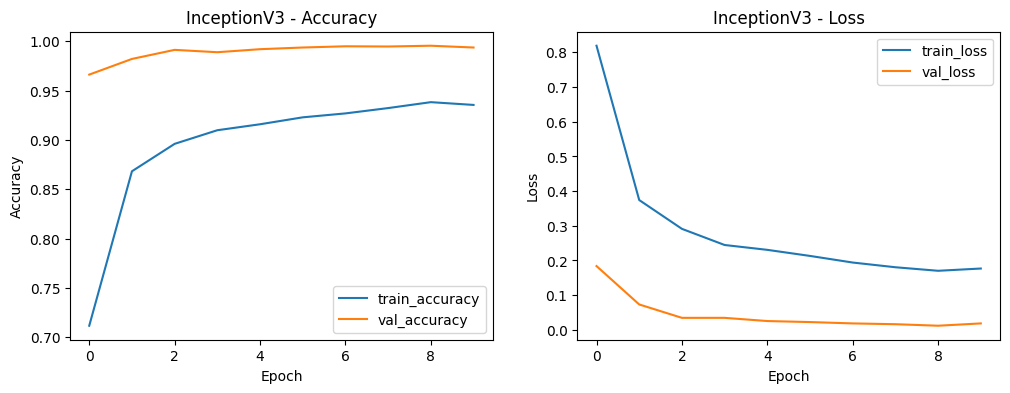

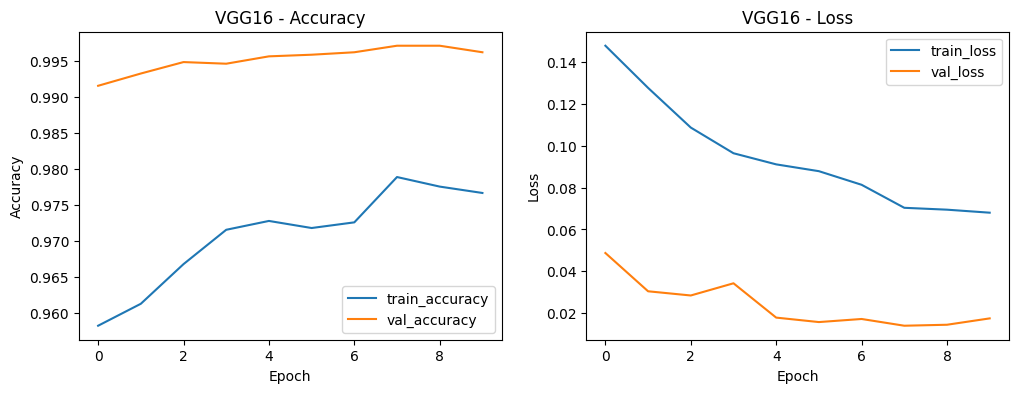

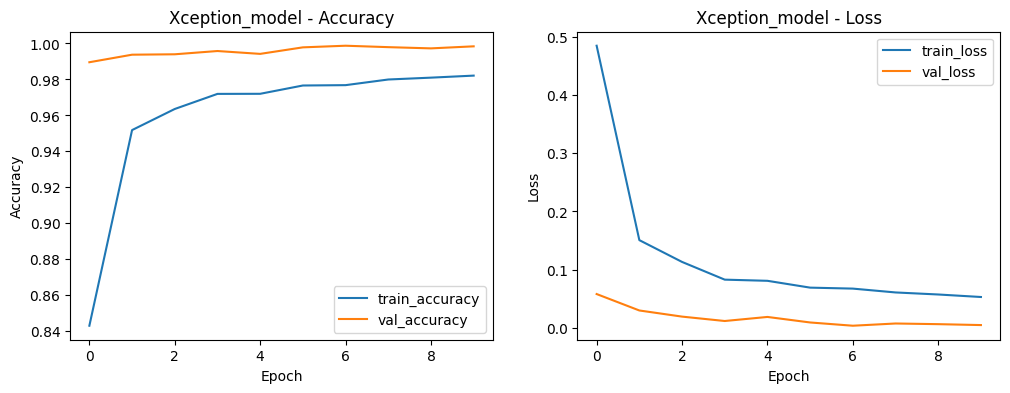

In [38]:
import matplotlib.pyplot as plt

def plot_history(histories, titles):
    for i, history in enumerate(histories):
        plt.figure(figsize=(12, 4))
        # Plot accuracy
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='train_accuracy')
        plt.plot(history.history['val_accuracy'], label='val_accuracy')
        plt.title(f'{titles[i]} - Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot loss
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='train_loss')
        plt.plot(history.history['val_loss'], label='val_loss')
        plt.title(f'{titles[i]} - Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.show()

# Plot histories
plot_history([history_inception, history_vgg, history_xception],
             ['InceptionV3', 'VGG16', 'Xception_model'])

👉 em sẽ chọn model Xception

## Load model-weights để fine-tune

In [114]:
# load weights :
xception_model.load_weights(xception_checkpoint_path)

In [115]:
# In ra tên của mỗi lớp và trạng thái có thể train (trainable) của chúng
for layer in xception_model.layers:
    print(f'Layer Name: {layer.name}, Trainable: {layer.trainable}')

Layer Name: input_layer_9, Trainable: True
Layer Name: xception, Trainable: False
Layer Name: global_average_pooling2d_4, Trainable: True
Layer Name: flatten_4, Trainable: True
Layer Name: dense_8, Trainable: True
Layer Name: dropout_4, Trainable: True
Layer Name: dense_9, Trainable: True


### Mở thêm layer

In [116]:
# mở xception
xception_base = xception_model.get_layer('xception')
# Mở khóa các lớp trong Block13 và Block14
for layer in xception_base.layers:
    if 'block13' in layer.name or 'block14' in layer.name:
        layer.trainable = True
    else:
        layer.trainable = False  # Giữ nguyên các lớp khác không thay đổi


In [117]:
# In ra tên của mỗi lớp và trạng thái có thể train (trainable) của chúng
for layer in xception_model.layers:
    print(f'Layer Name: {layer.name}, Trainable: {layer.trainable}')

Layer Name: input_layer_9, Trainable: True
Layer Name: xception, Trainable: False
Layer Name: global_average_pooling2d_4, Trainable: True
Layer Name: flatten_4, Trainable: True
Layer Name: dense_8, Trainable: True
Layer Name: dropout_4, Trainable: True
Layer Name: dense_9, Trainable: True


In [118]:
# check layers inside the xception layers
for layer in xception_base.layers:
    print(f'Layer Name: {layer.name}, Trainable: {layer.trainable}')

Layer Name: input_layer_8, Trainable: False
Layer Name: block1_conv1, Trainable: False
Layer Name: block1_conv1_bn, Trainable: False
Layer Name: block1_conv1_act, Trainable: False
Layer Name: block1_conv2, Trainable: False
Layer Name: block1_conv2_bn, Trainable: False
Layer Name: block1_conv2_act, Trainable: False
Layer Name: block2_sepconv1, Trainable: False
Layer Name: block2_sepconv1_bn, Trainable: False
Layer Name: block2_sepconv2_act, Trainable: False
Layer Name: block2_sepconv2, Trainable: False
Layer Name: block2_sepconv2_bn, Trainable: False
Layer Name: conv2d_94, Trainable: False
Layer Name: block2_pool, Trainable: False
Layer Name: batch_normalization_94, Trainable: False
Layer Name: add, Trainable: False
Layer Name: block3_sepconv1_act, Trainable: False
Layer Name: block3_sepconv1, Trainable: False
Layer Name: block3_sepconv1_bn, Trainable: False
Layer Name: block3_sepconv2_act, Trainable: False
Layer Name: block3_sepconv2, Trainable: False
Layer Name: block3_sepconv2_bn, Tr

### Tạo model mới

In [119]:
def build_finetune_model(base_model, num_classes):
    # Freeze các lớp khác ngoài Block13 và Block14
    base_model.trainable = False

    # Define the input layer
    inputs = Input(shape=(224, 224, 3))

    # Pass the input through the base model
    x = base_model(inputs, training=False)

    # Global Average Pooling for downsampling the feature map
    x = GlobalAveragePooling2D()(x)

    # Thêm BatchNormalization để ổn định quá trình huấn luyện
    x = BatchNormalization()(x)

    # Flatten the output for the fully connected layers
    x = Flatten()(x)

    # Add a fully connected dense layer with ReLU activation
    x = Dense(128, activation="relu")(x)

    # Add a dropout layer for regularization
    x = Dropout(0.5)(x)

    # Final output layer with softmax activation for multi-class classification
    outputs = Dense(num_classes, activation="softmax")(x)

    # Create the model
    model = Model(inputs, outputs)
    return model

In [120]:
# Xây dựng lại mô hình với Xception làm base model
tune_xception_model = build_finetune_model(Xception(weights="imagenet", include_top=False), num_classes)

### Thiết lập checkpoint và callback cho finetune model

In [121]:
checkpoint_dir = './model_checkpoints.keras'
os.makedirs(checkpoint_dir, exist_ok=True)

fine_tune_checkpoint = ModelCheckpoint(filepath=os.path.join(checkpoint_dir, 'xception_finetune_best_weights.weights.h5'),
                                       save_weights_only=True,
                                       monitor='val_loss',
                                       mode='min',
                                       save_best_only=True,
                                       verbose=1)

tune_early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

tune_tensorboard_callback = TensorBoard(log_dir="logs/fit_finetune", histogram_freq=1)


### Data augmentation truoc khi train

In [122]:
finetune_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
finetune_train_generator = finetune_datagen.flow_from_dataframe(train, x_col='ImgPath', y_col='Class', target_size=(224, 224),batch_size=16)

Found 20371 validated image filenames belonging to 10 classes.


### Fit model

#### tính toán steps

In [123]:
num_train_samples = int(20371 * 0.8)  # 80% dữ liệu cho huấn luyện
num_val_samples = int(20371 * 0.05)    # 0.05% dữ liệu cho validation

batch_size = 16

steps_per_epoch = num_train_samples // batch_size
validation_steps = num_val_samples // batch_size

In [132]:
tune_xception_model.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ xception (Functional)                │ (None, 7, 7, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_17          │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_217              │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,668,556 (82.66 MB)

 Trainable params: 267,658 (1.02 MB)

 Non-trainable params: 20,865,576 (79.60 MB)

 Optimizer params: 535,322 (2.04 MB)

In [128]:
from tensorflow.keras.optimizers import Adam

# Recompile lại mô hình với learning rate thấp hơn
tune_xception_model.compile(optimizer=Adam(learning_rate=1e-5), loss="categorical_crossentropy", metrics=["accuracy"])

# Huấn luyện lại mô hình
history_fine_tune = tune_xception_model.fit(finetune_train_generator,
                                       batch_size=16,
                                       steps_per_epoch=steps_per_epoch,
                                       validation_steps=validation_steps,
                                       epochs=20,
                                       validation_data=val_generator,
                                       callbacks=[fine_tune_checkpoint, tune_tensorboard_callback, tune_early_stopping])


Epoch 1/20
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.1307 - loss: 3.1781
Epoch 1: val_loss improved from inf to 1.61428, saving model to ./model_checkpoints.keras/xception_finetune_best_weights.weights.h5
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 181s 168ms/step - accuracy: 0.1307 - loss: 3.1777 - val_accuracy: 0.4762 - val_loss: 1.6143
Epoch 2/20
 255/1018 ━━━━━━━━━━━━━━━━━━━━ 1:57 154ms/step - accuracy: 0.3138 - loss: 2.1478

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss improved from 1.61428 to 1.43554, saving model to ./model_checkpoints.keras/xception_finetune_best_weights.weights.h5
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 43s 42ms/step - accuracy: 0.3187 - loss: 2.1127 - val_accuracy: 0.5357 - val_loss: 1.4355
Epoch 3/20
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.3787 - loss: 1.8876
Epoch 3: val_loss improved from 1.43554 to 1.02787, saving model to ./model_checkpoints.keras/xception_finetune_best_weights.weights.h5
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 168s 164ms/step - accuracy: 0.3787 - loss: 1.8875 - val_accuracy: 0.6667 - val_loss: 1.0279
Epoch 4/20
 255/1018 ━━━━━━━━━━━━━━━━━━━━ 1:57 154ms/step - accuracy: 0.4827 - loss: 1.5801
Epoch 4: val_loss improved from 1.02787 to 0.88059, saving model to ./model_checkpoints.keras/xception_finetune_best_weights.weights.h5
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 43s 43ms/step - accuracy: 0.4809 - loss: 1.5688 - val_accuracy: 0.7044 - val_loss: 0.8806
Epoch 5/20
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 0s

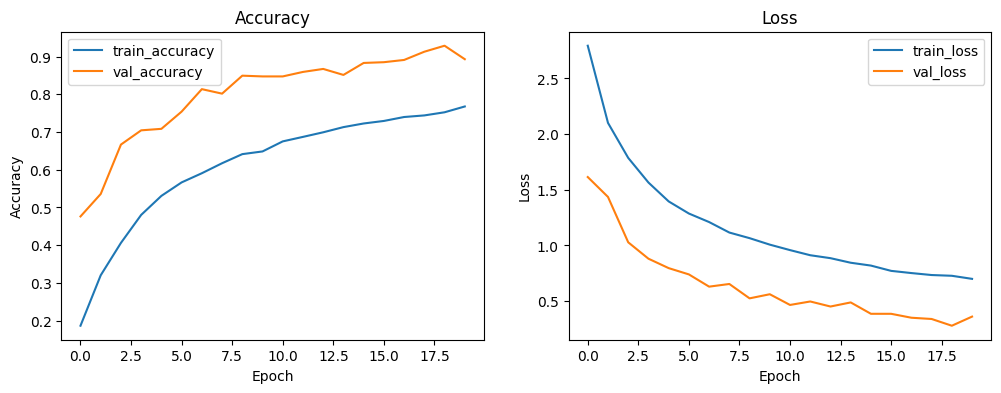

In [131]:
# plot accuracy and loss
def plot_accuracy_and_loss(history):
    # Plot accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_accuracy_and_loss(history_fine_tune)


In [134]:
# đánh giá mô hình
test_loss, test_accuracy = tune_xception_model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

  8/929 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.9794 - loss: 0.2158

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


929/929 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9013 - loss: 0.3401
Test Loss: 0.3352583646774292, Test Accuracy: 0.9007540941238403


# Lưu mô hình vào drive

In [137]:
# Tạo save path vào drive
save_dir = "/content/drive/MyDrive/Funix_Capstone_model.keras"
# os.makedirs(save_dir) # Tạo directory nếu nó không tồn tại

# Lưu mô hình
tune_xception_model.save(save_dir)